# import libraries

In [3]:
import pandas
import configparser
import psycopg2

# connect to database

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [5]:
cur=conn.cursor()

# q1

In [6]:
df_student=pandas.read_sql_query('select * from gp18.student',conn)
df_student[:]


,stu_email,stu_name,major
0,osoriojt@jmu.edu,Julian Osorio,IA
1,henriquesta@jmu.edu,Tayler Henriques,IA
2,perezst@jmu.edu,Spencer Perez,SRM
3,conrowrc@jmu.edu,Ryan Conrow,SRM
4,s6@jmu.edu,s5,ia


# q2

In [7]:
sql_statement = """select gp18.professor.prof_name,
            gp18.course.course_name
        from gp18.professor
        inner join gp18.course
        on gp18.professor.prof_email = gp18.course.prof_email"""

In [8]:
df_student=pandas.read_sql_query('select * from gp18.professor',conn)
df_student[:]

,prof_email,prof_name,office
0,danzelox@jmu.edu,Orlandrew Danzell,isat/cs107
1,hendinx@jmu.edu,Noel Hendrickson,isat/cs322
2,marrinsp@jmu.edu,Stephen Marrin,engeo2140
3,new_prof_email,new_prof_name,new_office


# q3

In [9]:
sql_q3= """select course_num,
                count(course_num) as enrolled
                from gp18.enrollment_list
                group by course_num
                order by enrolled desc
                """

<AxesSubplot:xlabel='course_num'>

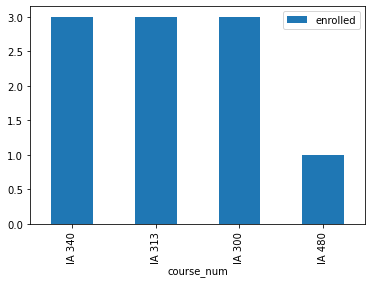

In [10]:
df=pandas.read_sql_query(sql_q3,conn)

df.plot.bar(y='enrolled',x='course_num')

# q4

In [11]:
sql_q4 = """select gp18.professor.prof_name,
        count(gp18.course.course_name) as course_num
        from gp18.professor
        inner join gp18.course
        on gp18.professor.prof_email = gp18.course.prof_email
        group by professor.prof_name
        order by course_num desc"""

In [12]:
df= pandas.read_sql_query(sql_q4,conn)

df[:]

,prof_name,course_num
0,new_prof_name,2
1,Noel Hendrickson,1
2,Stephen Marrin,1
3,Orlandrew Danzell,1


<AxesSubplot:xlabel='prof_name'>

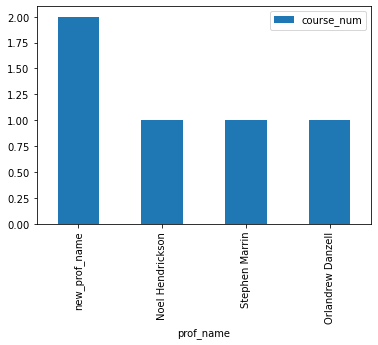

In [14]:
df.plot.bar(x='prof_name',y='course_num')

# q5

In [15]:
q5_insert_professor_sql = """
            insert into gp18.professor(prof_email,prof_name,office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp18.professor(prof_email,prof_name,office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [16]:
cur.execute(q5_insert_professor_sql)

In [17]:
# conn.rollback() #if error, rollback

In [19]:
conn.commit() # no error. commit

In [20]:
df=pandas.read_sql_query('select * from gp18.professor',conn)
df[:]

,prof_email,prof_name,office
0,danzelox@jmu.edu,Orlandrew Danzell,isat/cs107
1,hendinx@jmu.edu,Noel Hendrickson,isat/cs322
2,marrinsp@jmu.edu,Stephen Marrin,engeo2140
3,new_prof_email,new_prof_name,new_office
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [49]:
q5_insert_course_sql = """
            insert into gp18.course(course_num,course_name,room_num,prof_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_num','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp18.course(course_num,course_name,room_num,prof_email)
            values('new_lab4_c','new_lab4_num','new_lab4_r','new_lab4_email')
            


In [46]:
conn.commit() # no error. commit

In [47]:
df=pandas.read_sql_query('select * from gp18.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 480,AML,isat0148,danzelox@jmu.edu
1,IA 300,Seminar on Issues,isat150,marrinsp@jmu.edu
2,IA 313,Counterfact Reason,engeo1204,hendinx@jmu.edu
3,new_c_num,new_course_name,new_room,new_prof_email
4,IA 340,Data Mining,engeo2010,new_prof_email
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [64]:
q6_update_course_sql ="""
                    update gp18.course
                    set prof_email = '{}'
                    where prof_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [65]:
cur.execute(q6_update_course_sql)

In [66]:
conn.commit() # no error. commit

In [68]:
df=pandas.read_sql_query('select * from gp18.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 480,AML,isat0148,danzelox@jmu.edu
1,IA 300,Seminar on Issues,isat150,marrinsp@jmu.edu
2,IA 313,Counterfact Reason,engeo1204,hendinx@jmu.edu
3,new_c_num,new_course_name,new_room,new_prof_email
4,IA 340,Data Mining,engeo2010,new_prof_email
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [69]:
q6_delete_professor_sql = """
                            delete from gp18.professor
                            where prof_email='{}'
                            """.format('t2@jmu.edu')

In [70]:
cur.execute(q6_delete_professor_sql)

In [71]:
conn.commit() # no error. commit

In [72]:

df=pandas.read_sql_query('select * from gp18.professor',conn)
df[:]

,prof_email,prof_name,office
0,danzelox@jmu.edu,Orlandrew Danzell,isat/cs107
1,hendinx@jmu.edu,Noel Hendrickson,isat/cs322
2,marrinsp@jmu.edu,Stephen Marrin,engeo2140
3,new_prof_email,new_prof_name,new_office
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [73]:
cur.close()
conn.close()